In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv',',')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
Id                     10000 non-null int64
age                    10000 non-null float64
years_of_experience    10000 non-null float64
lesson_price           10000 non-null float64
qualification          10000 non-null float64
physics                10000 non-null float64
chemistry              10000 non-null float64
biology                10000 non-null float64
english                10000 non-null float64
geography              10000 non-null float64
history                10000 non-null float64
mean_exam_points       10000 non-null float64
choose                 10000 non-null int64
dtypes: float64(11), int64(2)
memory usage: 1015.7 KB


In [4]:
df.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,4999.50000,45.800900,1.974800,1702.440000,1.724300,0.37060,0.121500,0.117200,0.059100,0.02770,0.018000,64.435200,0.110900
std,2886.89568,8.030274,1.766883,523.789062,0.798845,0.48299,0.326724,0.321675,0.235824,0.16412,0.132958,13.595024,0.314024
min,0.00000,23.000000,0.000000,200.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,33.000000,0.000000
25%,2499.75000,40.000000,0.000000,1300.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,55.000000,0.000000
50%,4999.50000,46.000000,2.000000,1550.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,63.000000,0.000000
75%,7499.25000,51.000000,3.000000,2150.000000,2.000000,1.00000,0.000000,0.000000,0.000000,0.00000,0.000000,74.000000,0.000000
max,9999.00000,68.000000,9.000000,3950.000000,4.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,100.000000,1.000000


In [5]:
df.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
0,0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0
1,1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0,1
2,2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0,0
3,3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,1
4,4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,73.0,0


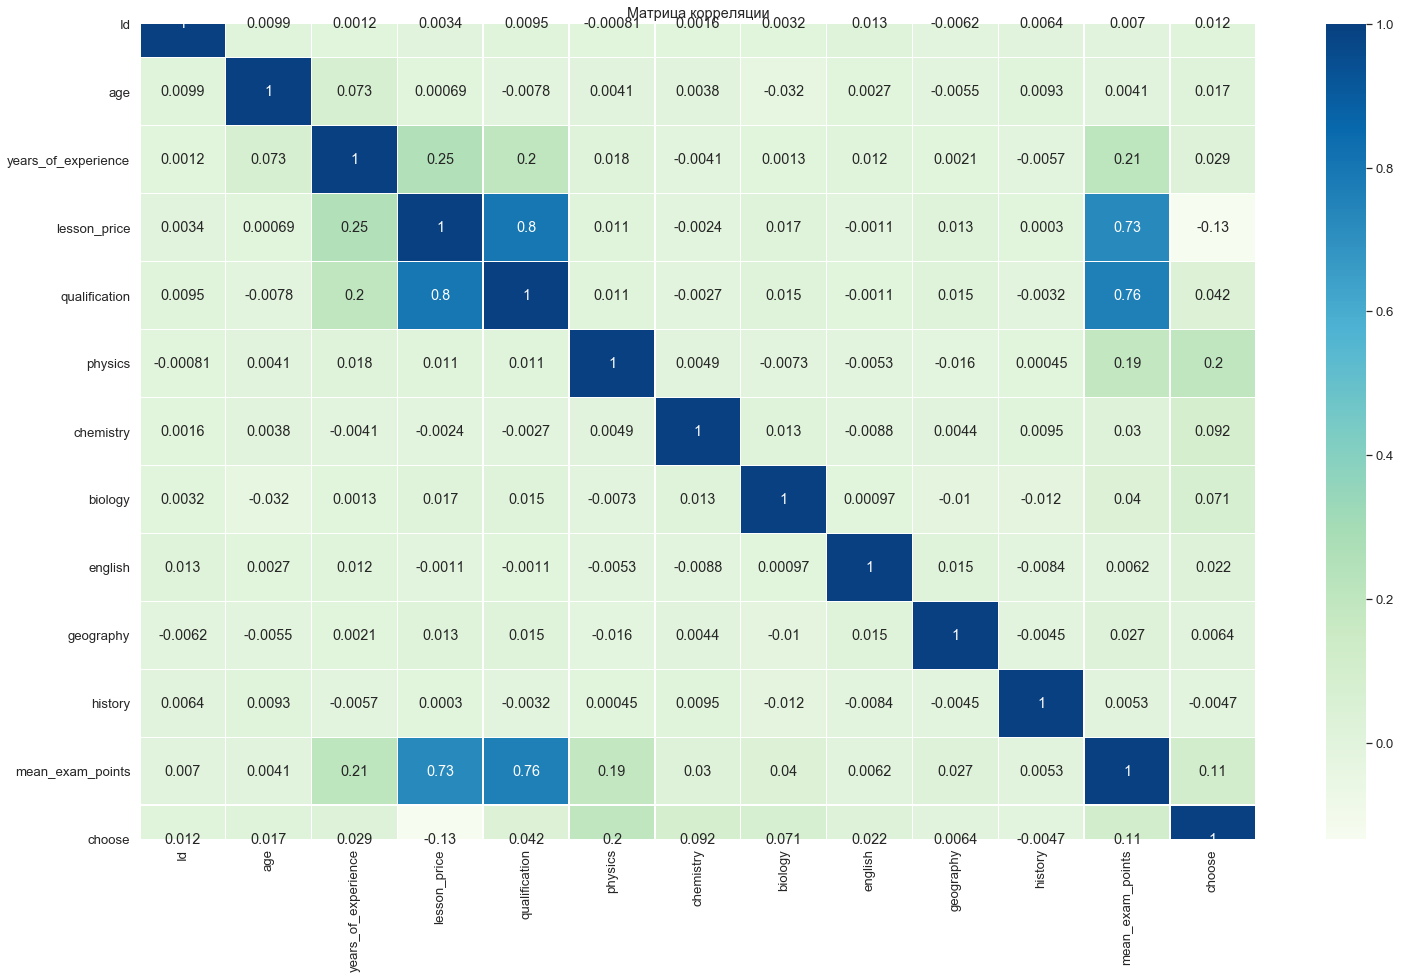

In [6]:
plt.figure(figsize = (25,15))

sns.set(font_scale=1.2)
sns.heatmap(df.corr(), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Матрица корреляции')
plt.show()

In [7]:
y = df['choose'].values
y

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [8]:
X = df.loc[:,['physics', 'lesson_price','mean_exam_points','chemistry','biology','qualification','years_of_experience']].values
X

array([[0.00e+00, 2.15e+03, 7.40e+01, ..., 0.00e+00, 2.00e+00, 0.00e+00],
       [1.00e+00, 1.25e+03, 5.70e+01, ..., 1.00e+00, 2.00e+00, 2.00e+00],
       [1.00e+00, 1.75e+03, 6.60e+01, ..., 0.00e+00, 1.00e+00, 3.00e+00],
       ...,
       [0.00e+00, 1.75e+03, 5.90e+01, ..., 0.00e+00, 1.00e+00, 5.00e+00],
       [1.00e+00, 1.70e+03, 7.20e+01, ..., 0.00e+00, 2.00e+00, 0.00e+00],
       [0.00e+00, 1.20e+03, 4.00e+01, ..., 0.00e+00, 1.00e+00, 5.00e+00]])

In [9]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [10]:
X_st = X.copy()

In [11]:
#X_st[:, 0:3] = calc_std_feat(X[:, 0:3])
#X_st[:, -1] = calc_std_feat(X[:, -1])
X_st = calc_std_feat(X)

In [12]:
X_st = X_st.T
X_st

array([[-0.40525371, -0.40365208, -0.40365208, ..., -0.40525371,
        -0.40365208, -0.40525371],
       [ 3.03824491,  1.59678037,  2.39759401, ...,  2.39759401,
         2.31751264,  1.51669901],
       [-0.28673329, -0.31396095, -0.29954631, ..., -0.3107577 ,
        -0.28993654, -0.34118862],
       ...,
       [-0.40525371, -0.40365208, -0.40525371, ..., -0.40525371,
        -0.40525371, -0.40525371],
       [-0.40205045, -0.40205045, -0.40365208, ..., -0.40365208,
        -0.40205045, -0.40365208],
       [-0.40525371, -0.40205045, -0.40044882, ..., -0.39724557,
        -0.40525371, -0.39724557]])

In [13]:
def calc_logloss(y, y_pred):
    for i in range(y_pred.shape[0]):
        if y_pred[i]==1:
            y_pred[i]-=1e-4
        elif y_pred[i]==0:
            y_pred[i]+=1e-4
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    err = np.sum(err)
    return err

In [14]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-0.9*z))
    return res

In [15]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [22]:
W = eval_model(X_st, y, iterations=15000, alpha=1)

1500 [-0.03800541 -0.69300414  2.17833692  0.93913031 -0.82277234 -0.75233785
  1.04396372] 0.33560004716199854
3000 [-0.31171109 -0.72324835  3.89143324  0.61705883 -1.14952838 -1.00874927
  0.76894236] 0.33358244893873223
4500 [-0.57845953 -0.75282551  5.56325585  0.30252654 -1.46873732 -1.25843758
  0.50091497] 0.33166109085171536
6000 [-8.38512484e-01 -7.81761553e-01  7.19526974e+00 -4.74050842e-03
 -1.78067382e+00 -1.50164470e+00  2.39603306e-01] 0.3298303079749098
7500 [-1.09211423 -0.81007588  8.78887976 -0.30499856 -2.08559482 -1.73859652
 -0.01525209] 0.3280848222124423
9000 [-1.3394979  -0.83778734 10.34542814 -0.59849248 -2.38374583 -1.96950913
 -0.26389823] 0.32641971437897727
10500 [-1.58088591 -0.86491416 11.86619709 -0.88545623 -2.67536138 -2.19458919
 -0.5065703 ] 0.32483039805641384
12000 [-1.8164905  -0.891474   13.35241146 -1.16611331 -2.96066553 -2.41403432
 -0.74349214] 0.3233125951987933
13500 [-2.04651416 -0.91748392 14.80524138 -1.44067723 -3.23987231 -2.6280335

In [23]:
def calc_pred_proba(W, X):
    z = np.dot(W, X)
    y_pred = sigmoid(z)
    return y_pred

In [24]:
y_pred = calc_pred_proba(W,X_st)
y_pred

array([0.07122407, 0.14752717, 0.09833806, ..., 0.08473078, 0.11852962,
       0.11139754])

In [25]:
df_kaggle = pd.read_csv('test.csv',',')
df_kaggle.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,10000,32.0,2.0,2700.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0
1,10001,35.0,6.0,1800.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,71.0
2,10002,44.0,2.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
3,10003,44.0,4.0,2950.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,92.0
4,10004,38.0,3.0,1400.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,58.0


In [26]:
X_kaggle = df_kaggle.loc[:,['physics', 'lesson_price','mean_exam_points','chemistry','biology','qualification','years_of_experience']].values
X_kaggle

array([[0.00e+00, 2.70e+03, 9.00e+01, ..., 0.00e+00, 3.00e+00, 2.00e+00],
       [1.00e+00, 1.80e+03, 7.10e+01, ..., 0.00e+00, 2.00e+00, 6.00e+00],
       [0.00e+00, 1.20e+03, 4.50e+01, ..., 0.00e+00, 1.00e+00, 2.00e+00],
       ...,
       [1.00e+00, 1.25e+03, 6.30e+01, ..., 0.00e+00, 1.00e+00, 2.00e+00],
       [1.00e+00, 1.00e+03, 6.40e+01, ..., 1.00e+00, 2.00e+00, 5.00e+00],
       [1.00e+00, 1.50e+03, 4.10e+01, ..., 1.00e+00, 1.00e+00, 0.00e+00]])

In [27]:
X_kaggle_st = X_kaggle.copy()

In [28]:
#Нужно те же mean и std использовать на тестовой выборки, чтобы данные были такого же масштаба, как и обучающая выборка
X_kaggle_st = (X_kaggle_st - X.mean()) / X.std()

In [29]:
X_kaggle_st = X_kaggle_st.T
X_kaggle_st

array([[-0.40525371, -0.40365208, -0.40525371, ..., -0.40365208,
        -0.40365208, -0.40365208],
       [ 3.91913991,  2.47767537,  1.51669901, ...,  1.59678037,
         1.19637356,  1.99718719],
       [-0.26110725, -0.29153817, -0.33318048, ..., -0.30435119,
        -0.30274956, -0.33958699],
       ...,
       [-0.40525371, -0.40525371, -0.40525371, ..., -0.40525371,
        -0.40365208, -0.40365208],
       [-0.40044882, -0.40205045, -0.40365208, ..., -0.40365208,
        -0.40205045, -0.40365208],
       [-0.40205045, -0.39564394, -0.40205045, ..., -0.40205045,
        -0.39724557, -0.40525371]])

In [30]:
kaggle_prediction = calc_pred_proba(W,X_kaggle_st)
kaggle_prediction

array([0.04978619, 0.10168944, 0.12407364, ..., 0.16699078, 0.22169968,
       0.07848762])

In [31]:
df_kaggle['choose'] = kaggle_prediction
df_kaggle.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
0,10000,32.0,2.0,2700.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,0.049786
1,10001,35.0,6.0,1800.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,71.0,0.101689
2,10002,44.0,2.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,0.124074
3,10003,44.0,4.0,2950.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,92.0,0.037373
4,10004,38.0,3.0,1400.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,58.0,0.126607


In [32]:
df_kaggle.drop("age", axis=1, inplace=True)
df_kaggle.drop("years_of_experience", axis=1, inplace=True)
df_kaggle.drop("lesson_price", axis=1, inplace=True)
df_kaggle.drop("qualification", axis=1, inplace=True)
df_kaggle.drop("physics", axis=1, inplace=True)
df_kaggle.drop("chemistry", axis=1, inplace=True)
df_kaggle.drop("biology", axis=1, inplace=True)
df_kaggle.drop("english", axis=1, inplace=True)
df_kaggle.drop("geography", axis=1, inplace=True)
df_kaggle.drop("history", axis=1, inplace=True)
df_kaggle.drop("mean_exam_points", axis=1, inplace=True)
df_kaggle.head()

,Id,choose
0,10000,0.049786
1,10001,0.101689
2,10002,0.124074
3,10003,0.037373
4,10004,0.126607


In [33]:
df_kaggle.to_csv('sych_gulnara.csv',index=False)